In [1]:
import pandas as pd
import numpy as np
import zipfile as zp
import os
from scipy import ndimage
import matplotlib.pyplot as plt

In [3]:
with zp.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall("")

# Close the ZIP file
zip_ref.close()

In [7]:
def rename_csv_files(folder):
    for root, _, files in os.walk(folder):
        for filename in files:
            if " " in filename:
                old_path = os.path.join(root, filename)
                new_filename = filename.replace(" ", "_")
                new_path = os.path.join(root, new_filename)
                
                # Check if the new file name already exists, and if so, remove it
                if os.path.exists(new_path):
                    os.remove(new_path)
                
                # Rename the file
                os.rename(old_path, new_path)

rename_csv_files("rice_images")

In [8]:
import h5py
from PIL import Image, ImageOps, ImageEnhance
import os

def adjust_contrast(img, contrast_factor):
    enhancer = ImageEnhance.Contrast(img)
    contrast_adjusted_img = enhancer.enhance(contrast_factor)
    return Image.blend(img, contrast_adjusted_img, contrast_factor)

# Function to read and convert a PNG file to a dataset
def convert_jpg_to_array(image_path):
    image = Image.open(image_path)
    image = adjust_contrast(image, 1.8)
    image_data = np.array(image)
    return image_data
    
def convert_images_to_dataset():
    ls = []
    image_data=[]
    for root, _, files in os.walk("rice_images"):
      label = root[len("rice_images")+1:]
      for filename in files:
        image_path = os.path.join(root, filename)
        data = convert_jpg_to_array(image_path)
        image_data.append(data)
        if label == "_BrownSpot":
          ls.append(1)
        elif label == "_Healthy":
          ls.append(0)
        elif label == "_Hispa":
          ls.append(2)
        elif label == "_LeafBlast":
          ls.append(3)
    return image_data, ls

image_data, ls = convert_images_to_dataset()

In [9]:
df = pd.DataFrame()
df["image_data"] = image_data
df["label"] = ls
df = df.sample(frac=1, random_state=42)  # Set a random_state for reproducibility
df.reset_index(drop=True, inplace=True)
image_data = df["image_data"].to_list()
label = df["label"].to_list()
h5_file_path = 'dataset/rice_data.h5'  
with h5py.File(h5_file_path, 'w') as hf:
    hf.create_dataset('image_data', data=np.array(image_data))
    hf.create_dataset('label', data=np.array(label))
    

In [10]:
len(df)

3355

In [11]:
cutoff = int(len(df) * 0.8)
image_data = df["image_data"].iloc[cutoff:].to_list()
label = df["label"].iloc[cutoff:].to_list()
h5_file_path = 'dataset/test_rice_data.h5'  
with h5py.File(h5_file_path, 'w') as hf:
    hf.create_dataset('image_data', data=np.array(image_data))
    hf.create_dataset('label', data=np.array(label))

In [298]:
pattern = r"/([^/]+\.jpg)"  # This regex pattern captures the filename ending with .jpg
string = "rice_images/_BrownSpot"
pattern1 = r"/([^/]+)"
match = re.search(pattern1, string)

if match:
    filename = match.group(1)
    print("Extracted Filename:", filename)
else:
    print("No .jpg filename found in the string.")
type(filename)

Extracted Filename: _BrownSpot


str

In [14]:
data = h5py.File("dataset/rice_data.h5")
np.array(data["image_data"][0])

array([[[230, 205, 184],
        [230, 205, 184],
        [230, 205, 184],
        ...,
        [233, 205, 196],
        [233, 205, 196],
        [235, 208, 199]],

       [[230, 205, 184],
        [230, 205, 184],
        [230, 205, 184],
        ...,
        [233, 205, 196],
        [233, 205, 196],
        [235, 208, 199]],

       [[230, 205, 184],
        [230, 205, 184],
        [230, 205, 184],
        ...,
        [233, 205, 196],
        [233, 205, 196],
        [233, 205, 196]],

       ...,

       [[215, 189, 178],
        [215, 189, 178],
        [215, 189, 178],
        ...,
        [190, 169, 157],
        [189, 166, 154],
        [187, 165, 153]],

       [[215, 189, 178],
        [215, 189, 178],
        [215, 189, 178],
        ...,
        [190, 169, 157],
        [189, 166, 154],
        [187, 165, 153]],

       [[215, 189, 178],
        [215, 189, 178],
        [215, 189, 178],
        ...,
        [190, 169, 157],
        [189, 166, 154],
        [187, 165, 153]]

In [110]:

def apply_blue_filter(image, filter_factor):
    blue_filter = ImageOps.colorize(image.convert("L"), "#0000FF", "#000000")
    return Image.blend(image, blue_filter, filter_factor)


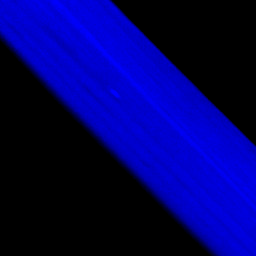

In [195]:
apply_blue_filter(image, 1.5)

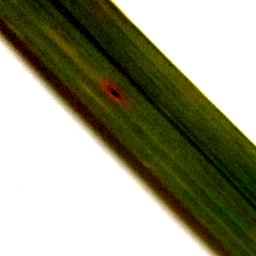

In [332]:
adjust_contrast(image, 1.8)